In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Loading Dataset

In [ ]:
data_df = pd.read_csv("/HappyLens-NN/data/happiness_data.csv")
data_df

,Year,Rank,Country,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
0,2024,1,Finland,7.736,1.7490,1.783000,0.8240,0.986000,0.110000,0.502000
1,2024,2,Denmark,7.521,1.8250,1.748000,0.8200,0.955000,0.150000,0.488000
2,2024,3,Iceland,7.515,1.7990,1.840000,0.8730,0.971000,0.201000,0.173000
3,2024,4,Sweden,7.345,1.7830,1.698000,0.8890,0.952000,0.170000,0.467000
4,2024,5,Netherlands,7.306,1.8220,1.667000,0.8440,0.860000,0.186000,0.344000
...,...,...,...,...,...,...,...,...,...,...
1951,2011,152,Burundi,3.678,0.3674,0.627745,0.3348,0.299345,0.182982,0.132473
1952,2011,153,Sierra Leone,3.586,0.3674,0.627745,0.3348,0.299345,0.182982,0.132473
1953,2011,154,Central African Republic,3.568,0.3674,0.627745,0.3348,0.299345,0.182982,0.132473
1954,2011,155,Benin,3.493,0.3674,0.627745,0.3348,0.299345,0.182982,0.132473


### Get top-20 countries by Happiness Score

In [3]:
top_10_countries = (
    data_df.groupby("Country")["HappinessScore"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)
top_10_df = data_df[data_df["Country"].isin(top_10_countries)]

### Static Line Plot of Top-20 Countries

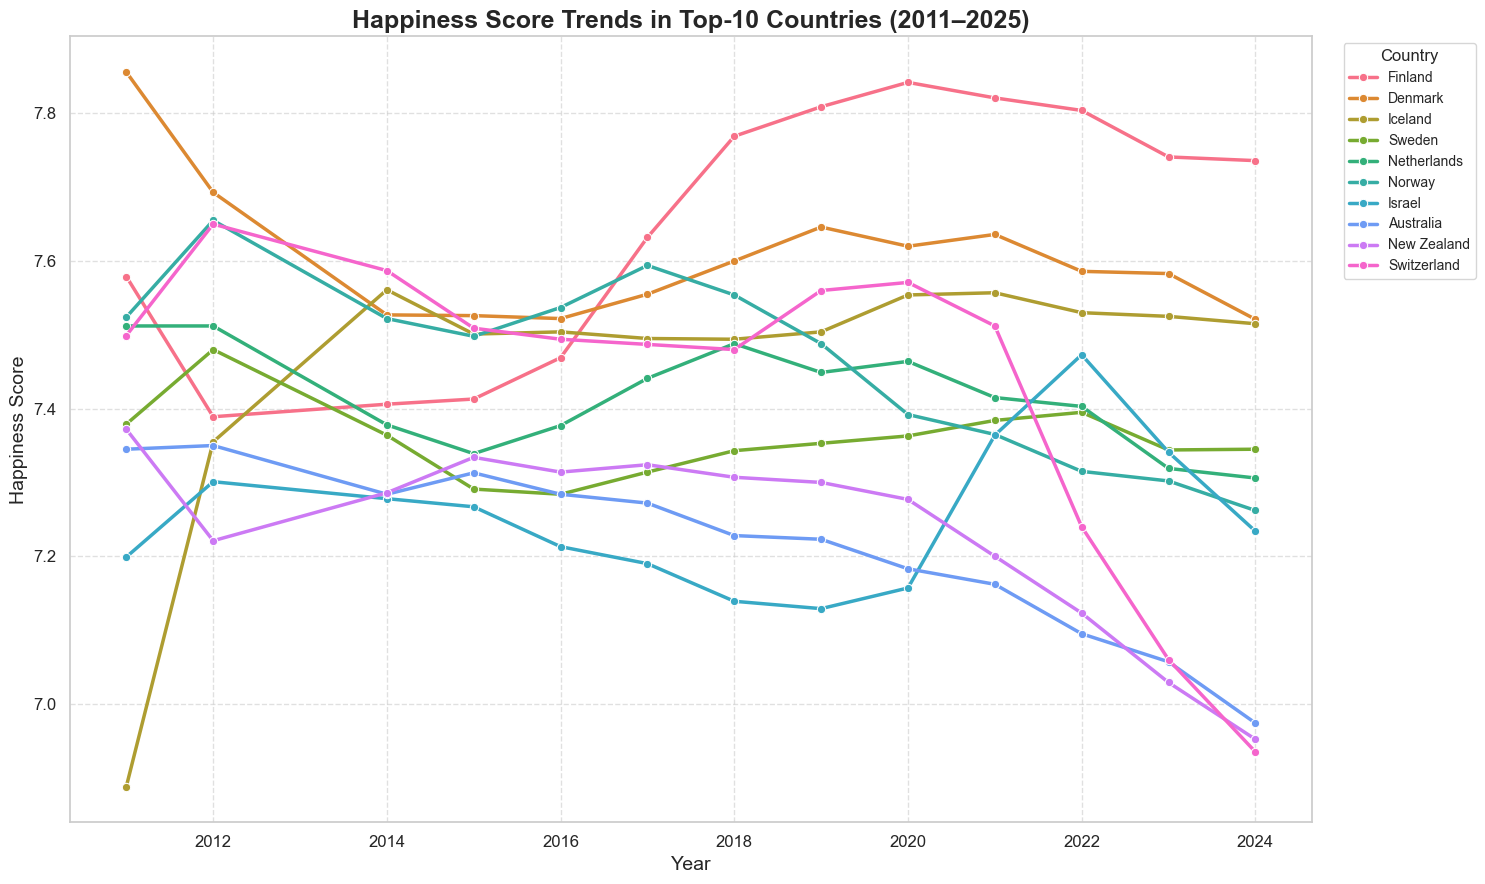

In [4]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 9))
palette = sns.color_palette("husl", len(top_10_countries)) 

sns.lineplot(
    data=top_10_df,
    x="Year",
    y="HappinessScore",
    hue="Country",
    marker="o",
    linewidth=2.5,
    palette=palette
)

plt.title("Happiness Score Trends in Top-10 Countries (2011–2025)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Happiness Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Interactive Line Plot with Plotly

In [5]:
fig = px.line(
    top_10_df,
    x="Year",
    y="HappinessScore",
    color="Country",
    markers=True,
    title="Happiness Score Trends in Top-10 Countries (2020–2025)"
)

fig.update_layout(
    template="plotly_white",
    title_font_size=22,
    xaxis_title="Year",
    yaxis_title="Happiness Score",
    legend_title="Country",
    hovermode="x unified"
)

fig.show()


### Correlation Analysis (2024 Data)

In [6]:
happiness_df = data_df.copy()
happiness_df = happiness_df[happiness_df["Year"] == 2024]
happiness_df

,Year,Rank,Country,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
0,2024,1,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502
1,2024,2,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488
2,2024,3,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173
3,2024,4,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467
4,2024,5,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344
...,...,...,...,...,...,...,...,...,...,...
141,2024,143,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131
142,2024,144,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136
143,2024,145,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041
144,2024,146,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052


In [8]:
# Drop unnecessary columns
happiness_df = happiness_df.drop(columns=['Rank'])
df_for_corr = happiness_df.drop(columns=['Year'])
df_for_corr

,Country,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
0,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502
1,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488
2,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173
3,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467
4,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344
...,...,...,...,...,...,...,...,...
141,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131
142,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136
143,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041
144,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052


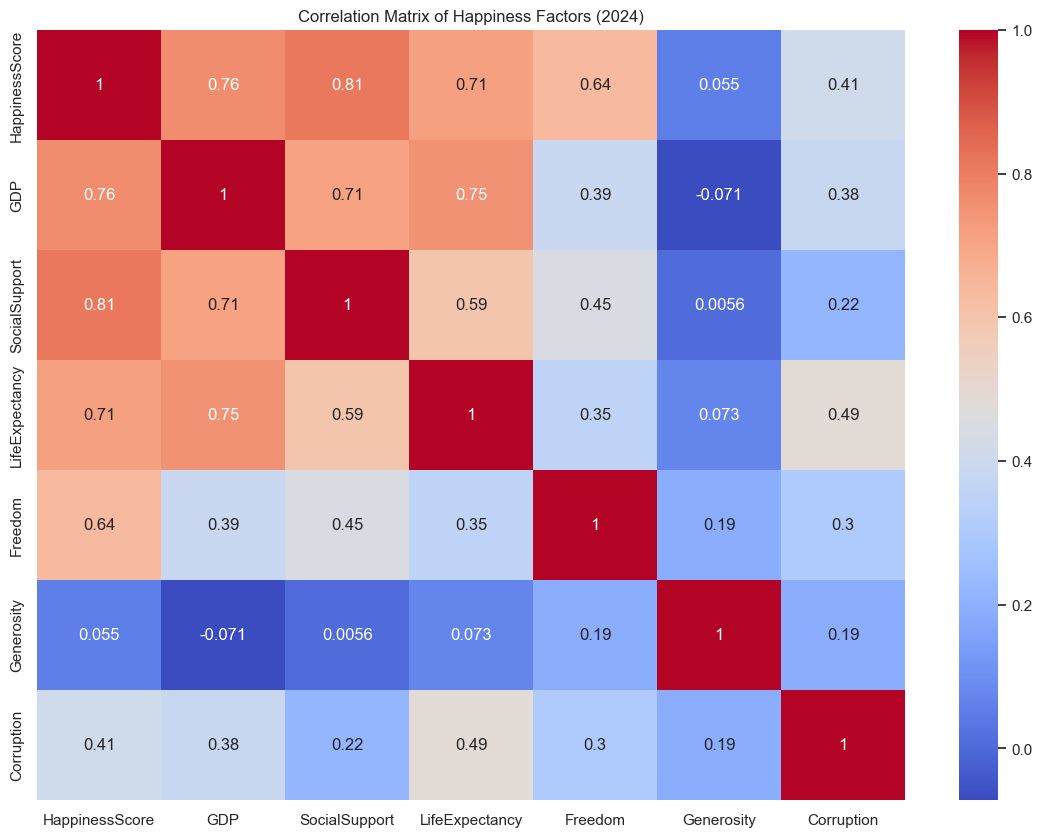

In [9]:
corr = df_for_corr.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Happiness Factors (2024)")
plt.show()

### **Correlation Insights:**

#### 1. **Happiness and Key Factors**:
- **Happiness Score** shows the **strongest positive correlation** with:
  - **Social Support**: 0.81
  - **GDP**: 0.76
  - **Life Expectancy**: 0.71  
  This suggests that countries with higher social support, GDP, and life expectancy tend to have higher happiness levels.

#### 2. **Economic Factors**:
- **GDP** positively correlates with all other factors, especially:
  - **Happiness Score** (0.76)
  - **Life Expectancy** (0.75)  
  This indicates that economic development contributes to overall well-being.

- We observe a lower correlation with **Freedom** (0.38), suggesting that while economic prosperity matters, it's not the only factor influencing happiness.

#### 3. **Social Support**:
- **Social Support** has a strong correlation with **Happiness Score** (0.81), highlighting the importance of social networks in improving quality of life.
- It shows a moderate correlation with **Life Expectancy** (0.59) and **GDP** (0.71), indicating social support is significant but has a lesser impact on other factors.

#### 4. **Freedom and Corruption**:
- **Freedom** shows a moderate positive correlation with **Happiness Score** (0.63), suggesting greater freedom often leads to higher happiness.
- **Corruption** has a moderate positive correlation with **Happiness Score** (0.41), indicating that reducing corruption could improve happiness.

#### 5. **Generosity**:
- **Generosity** shows a very weak correlation with **Happiness Score** (0.05), suggesting generosity is not a major factor in happiness.


### **Key Observations**:
- **Social Support** and **GDP** have the most significant positive impact on happiness, reinforcing the importance of economic development and social safety nets.
- **Freedom** and **Corruption** also matter, though their effects are less pronounced compared to socio-economic factors.
- **Generosity** is less impactful on happiness compared to other variables.


### **Recommendations**:
To improve happiness levels in countries:
- Focus on **economic development** (GDP).
- Enhance **social support** networks.
- Work on **reducing corruption** and increasing **freedom**.

### Descriptive Statistics of the Happiness Dataset (2024, 146 countries)

In [10]:
happiness_df.describe().round(2)

,Year,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption
count,146.0,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,2024.0,5.58,1.32,1.33,0.55,0.75,0.11,0.15
std,0.0,1.16,0.39,0.35,0.22,0.18,0.06,0.11
min,2024.0,1.36,0.00,0.00,0.00,0.00,0.00,0.00
25%,2024.0,4.69,1.04,1.13,0.41,0.66,0.07,0.07
50%,2024.0,5.86,1.34,1.43,0.55,0.77,0.11,0.12
75%,2024.0,6.49,1.65,1.59,0.71,0.88,0.15,0.18
max,2024.0,7.74,2.03,1.84,0.95,1.02,0.32,0.52


### **Summary of 2024 Happiness Statistics (146 Countries)**

1. **Happiness Score**  
- **Mean**: 5.58 | **Median**: 5.86 | **Range**: 1.36–7.74  
- Distribution is slightly skewed toward less happy countries. Most countries score between 4.7–6.5, but a few with extremely low values drag the average down.

2. **Log GDP per Capita**  
- **Mean**: 1.32 | **Max**: 2.03 (≈$80,000 PPP)  
- Wide income inequality is evident. Strong positive correlation with happiness (~0.76) confirms GDP's key role.

3. **Social Support**  
- **Mean**: 1.33 | **Max**: 1.84 | **Min**: 0  
- Reflects the perceived availability of trusted people. Countries with low values show weak social capital.

4. **Healthy Life Expectancy**  
- **Mean**: 0.55 (≈50–70 years of healthy life)  
- Major disparities exist, with some countries likely missing reliable data (min = 0).

5. **Freedom to Make Life Choices**  
- **Mean**: 0.75 | **Max**: 1.02  
- Around 75% of countries score above 0.66, though some report no perceived freedom at all.

6. **Generosity**  
- **Mean**: 0.11 | **Max**: 0.32  
- Overall low levels of generosity, with some countries showing no philanthropic activity. This is the least influential factor.

7. **Perceptions of Corruption**  
- **Mean**: 0.15 | **Max**: 0.52  
- High variation and frequent zero values suggest widespread distrust or data gaps. Corruption remains a serious issue globally.


### **Key Takeaways**  
- **GDP**, **Social Support**, and **Health** are the strongest contributors to happiness.  
- **Freedom** is also important, while **Generosity** and **Corruption Perception** have weaker influence.  
- Global inequality across all indicators is significant.  
- The 2024 data offers a realistic snapshot of global well-being, highlighting critical gaps in trust, healthcare, and social safety nets.
